In [1]:
import random
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math
import scipy.stats as stats
from scipy.stats import norm
from scipy.stats import kurtosis
import requests
%matplotlib inline

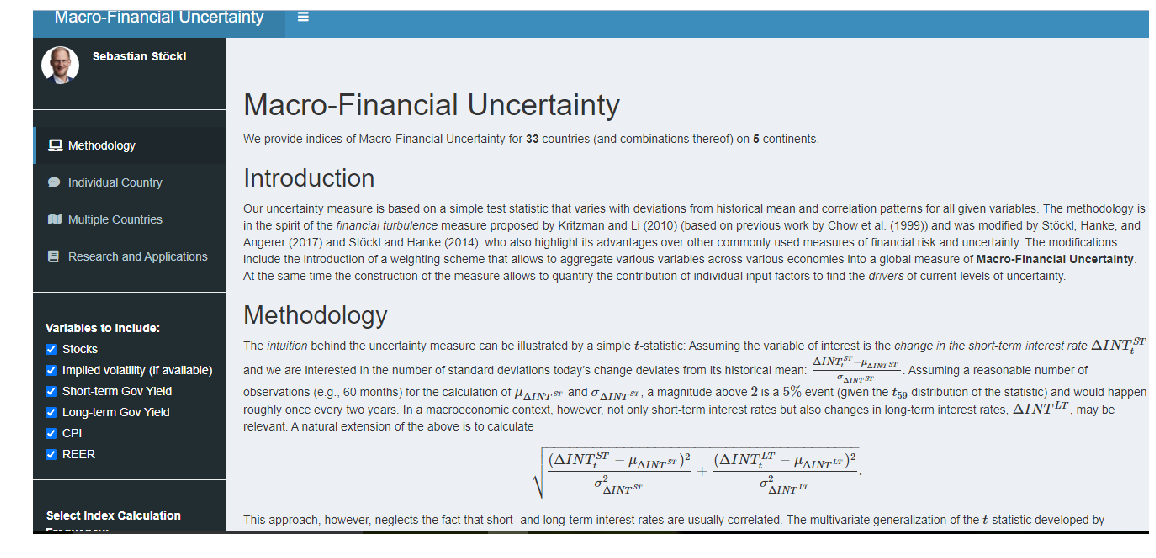

In [2]:
plt.figure(figsize = (20,20))
pic=plt.imread("C:\\Users\\nafissaad\\Desktop\\x.png")
plt.imshow(pic)
plt.axis('off')
plt.show()

In [3]:
df=pd.read_excel('C:\\Users\\nafissaad\\Downloads\\NEDL_Modified_Sharpe_MVaR.xlsx',index_col='Date')[['Large stocks','Small stocks','Treasury bonds','Corporate bonds','Gold','REIT']]
#df.to_excel('C:\\Users\\nafissaad\\Downloads\\NEDL_PMPT.xlsx')
df

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT
Date,,,,,,
2016-03-30,187.404327,103.284630,115.934731,63.101669,117.099998,67.771255
2016-03-31,186.949509,103.563309,116.757210,63.186726,117.639999,68.186249
2016-04-01,188.222961,103.804810,117.061729,63.232586,116.930000,68.096741
2016-04-04,187.613495,103.024544,117.133392,63.077179,116.150002,67.999100
2016-04-05,185.739670,101.835556,118.414383,62.844059,117.660004,67.551575
...,...,...,...,...,...,...
2021-03-23,389.500000,209.498306,137.490005,86.459999,161.809998,90.471031
2021-03-24,387.519989,206.307007,138.229996,86.510002,162.369995,89.963997
2021-03-25,389.700012,210.350006,137.139999,86.660004,161.779999,90.879997


In [4]:
returns=df.pct_change().fillna(0)
returns

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT
Date,,,,,,
2016-03-30,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2016-03-31,-0.002427,0.002698,0.007094,0.001348,0.004611,0.006123
2016-04-01,0.006812,0.002332,0.002608,0.000726,-0.006035,-0.001313
2016-04-04,-0.003238,-0.007517,0.000612,-0.002458,-0.006671,-0.001434
2016-04-05,-0.009988,-0.011541,0.010936,-0.003696,0.013000,-0.006581
...,...,...,...,...,...,...
2021-03-23,-0.007871,-0.028578,0.009027,0.001042,-0.007301,-0.001427
2021-03-24,-0.005083,-0.015233,0.005382,0.000578,0.003461,-0.005604
2021-03-25,0.005626,0.019597,-0.007885,0.001734,-0.003634,0.010182


In [5]:
matrix=pd.DataFrame(columns=[df.columns],index=['Average Return','Weights'])
matrix

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT
Average Return,NaN,NaN,NaN,NaN,NaN,NaN
Weights,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
matrix.loc['Average Return'].values

array([nan, nan, nan, nan, nan, nan], dtype=object)

In [7]:
matrix.loc['Average Return']=returns.mean(axis=0).values
matrix.loc['Weights']=1/6
matrix

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT
Average Return,0.000664,0.000661,0.000162,0.000271,0.000287,0.000347
Weights,0.166667,0.166667,0.166667,0.166667,0.166667,0.166667


In [8]:
matrix.loc['Weights','Large stocks'][0]

0.16666666666666666

In [9]:
demean_return=(returns-matrix.loc['Average Return'].values).astype(float)
demean_return

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT
Date,,,,,,
2016-03-30,-0.000664,-0.000661,-0.000162,-0.000271,-0.000287,-0.000347
2016-03-31,-0.003091,0.002037,0.006932,0.001077,0.004325,0.005776
2016-04-01,0.006148,0.001671,0.002446,0.000455,-0.006322,-0.001660
2016-04-04,-0.003902,-0.008177,0.000450,-0.002729,-0.006957,-0.001781
2016-04-05,-0.010652,-0.012202,0.010774,-0.003967,0.012714,-0.006928
...,...,...,...,...,...,...
2021-03-23,-0.008535,-0.029239,0.008865,0.000771,-0.007587,-0.001774
2021-03-24,-0.005748,-0.015894,0.005220,0.000307,0.003174,-0.005951
2021-03-25,0.004961,0.018936,-0.008048,0.001463,-0.003920,0.009835


In [10]:
Diagonal_Weights=pd.DataFrame(columns=[df.columns],index=[df.columns])
for i in df.columns:
    Diagonal_Weights.loc[i,i]=matrix.loc['Weights',i][0]
Diagonal_Weights=Diagonal_Weights.fillna(0)
Diagonal_Weights

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT
Large stocks,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000
Small stocks,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000
Treasury bonds,0.000000,0.000000,0.166667,0.000000,0.000000,0.000000
Corporate bonds,0.000000,0.000000,0.000000,0.166667,0.000000,0.000000
Gold,0.000000,0.000000,0.000000,0.000000,0.166667,0.000000
REIT,0.000000,0.000000,0.000000,0.000000,0.000000,0.166667


In [11]:
demean_return_cov=demean_return.cov()
demean_return_cov

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT
Large stocks,0.000139,1.507898e-04,-0.000040,0.000053,1.531396e-06,0.000126
Small stocks,0.000151,1.920793e-04,-0.000045,0.000062,1.232632e-07,0.000152
Treasury bonds,-0.000040,-4.487900e-05,0.000077,-0.000012,2.470668e-05,-0.000023
Corporate bonds,0.000053,6.215843e-05,-0.000012,0.000032,4.593213e-06,0.000059
Gold,0.000002,1.232632e-07,0.000025,0.000005,7.463061e-05,0.000012
REIT,0.000126,1.524322e-04,-0.000023,0.000059,1.165105e-05,0.000200


In [12]:
Invers_cov=pd.DataFrame(np.linalg.inv(demean_return_cov))
Invers_cov.columns=df.columns
Invers_cov.index=df.columns
Invers_cov

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT
Large stocks,54163.836081,-32686.593801,5648.007900,-18975.573332,-1292.537669,-2990.210118
Small stocks,-32686.593801,39937.490965,2241.192990,-9627.336045,1524.095537,-6845.987051
Treasury bonds,5648.007900,2241.192990,18178.846558,-1348.565338,-5663.754897,-2504.571935
Corporate bonds,-18975.573332,-9627.336045,-1348.565338,97156.669462,-3705.682971,-9109.868354
Gold,-1292.537669,1524.095537,-5663.754897,-3705.682971,15653.013024,-810.980273
REIT,-2990.210118,-6845.987051,-2504.571935,-9109.868354,-810.980273,14562.661712


In [13]:
Weights_sum_square=sum(matrix.loc['Weights']**2)#sum of square
Weights_sum_square

0.16666666666666669

In [14]:
Financial_turbulence=[]
for i in df.index:
    Financial_turbulence.append(np.sqrt(1/Weights_sum_square*((demean_return.loc[i].values.dot(Diagonal_Weights)).dot(Invers_cov)).dot((demean_return.loc[i].values.dot(Diagonal_Weights)).T)))

In [15]:
Financial_turbulence

[0.03391231559468341,
 0.5807495700505654,
 0.6741481271594842,
 0.5363474847144714,
 0.7386600194847314,
 0.8678168870901105,
 0.850946349356468,
 0.5563438635527636,
 0.7664395000939118,
 0.4973723731911769,
 1.4053596932254924,
 0.7116850178390713,
 0.6830719620217306,
 0.5534798564345002,
 0.9184856406809783,
 1.012508660804106,
 0.7687800929903867,
 1.010252658859041,
 0.8965247691029801,
 0.6948862752855648,
 0.894054236550978,
 1.0251429406014265,
 1.108920595037699,
 0.8228653511638065,
 1.0584252654190822,
 1.1173583582637072,
 0.454488221072153,
 0.7731544784896487,
 1.2870538045899371,
 0.9347603432782527,
 0.9890815001789118,
 0.7771448436693589,
 0.5798589505333472,
 0.520030271136572,
 0.6820861178919204,
 1.1347530527468583,
 0.4593014994775948,
 0.5721909131144225,
 0.23941661675875425,
 1.0175453655070044,
 0.3597060657200495,
 0.551830323451505,
 0.5453796532512079,
 0.37068200894237685,
 0.4385753109902327,
 0.5947562142101664,
 1.3379866872157138,
 0.914737666181512

In [16]:
df['Financial turbulence']=Financial_turbulence
df

,Large stocks,Small stocks,Treasury bonds,Corporate bonds,Gold,REIT,Financial turbulence
Date,,,,,,,
2016-03-30,187.404327,103.284630,115.934731,63.101669,117.099998,67.771255,0.033912
2016-03-31,186.949509,103.563309,116.757210,63.186726,117.639999,68.186249,0.580750
2016-04-01,188.222961,103.804810,117.061729,63.232586,116.930000,68.096741,0.674148
2016-04-04,187.613495,103.024544,117.133392,63.077179,116.150002,67.999100,0.536347
2016-04-05,185.739670,101.835556,118.414383,62.844059,117.660004,67.551575,0.738660
...,...,...,...,...,...,...,...
2021-03-23,389.500000,209.498306,137.490005,86.459999,161.809998,90.471031,1.977035
2021-03-24,387.519989,206.307007,138.229996,86.510002,162.369995,89.963997,0.908155
2021-03-25,389.700012,210.350006,137.139999,86.660004,161.779999,90.879997,1.118006


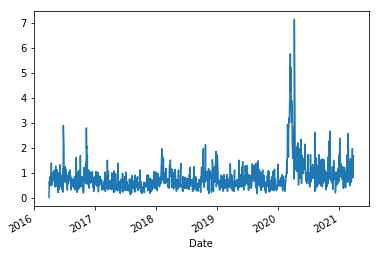

In [17]:
df['Financial turbulence'].plot()

In [18]:
df['Financial turbulence'].mean()

0.8281341163546121

In [19]:
#Stockl and Hank (2014)
#We can Minimize the turbulence